## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go

In [2]:
init_notebook_mode(connected=True)

## Import dataset

In [3]:
data = pd.read_csv("./datasets/segmentation data.csv", index_col = [0])
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [5]:
data[['Age', "Income"]].describe()

,Age,Income
count,2000.000000,2000.000000
mean,35.909000,120954.419000
std,11.719402,38108.824679
min,18.000000,35832.000000
25%,27.000000,97663.250000
50%,33.000000,115548.500000
75%,42.000000,138072.250000
max,76.000000,309364.000000


## EDA

In [6]:
plt.style.use("fivethirtyeight")

In [7]:
gender = data['Sex'].value_counts().to_frame()

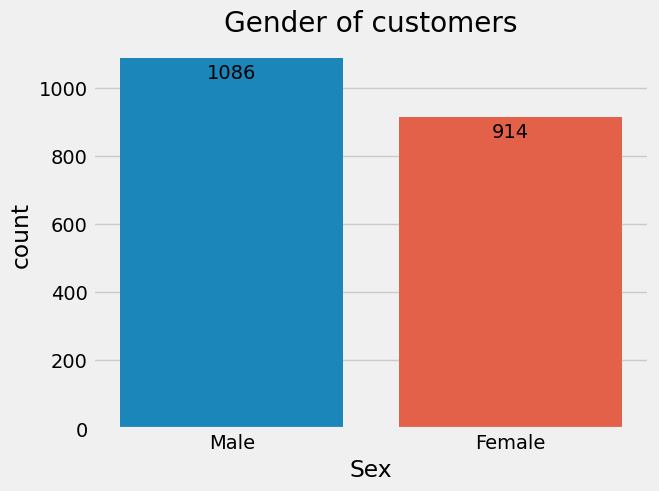

In [8]:
sns.countplot(x = "Sex", data = data)
plt.xticks(ticks = (0, 1), labels = ["Male", "Female"])
plt.title("Gender of customers")
for x, y in gender.itertuples():
    plt.text(x, y - 60, y, ha = 'center')
plt.show()


In [9]:
mrt = data['Marital status'].value_counts().to_frame()
mrt_grp = data.groupby('Marital status')['Sex'].value_counts().to_frame()

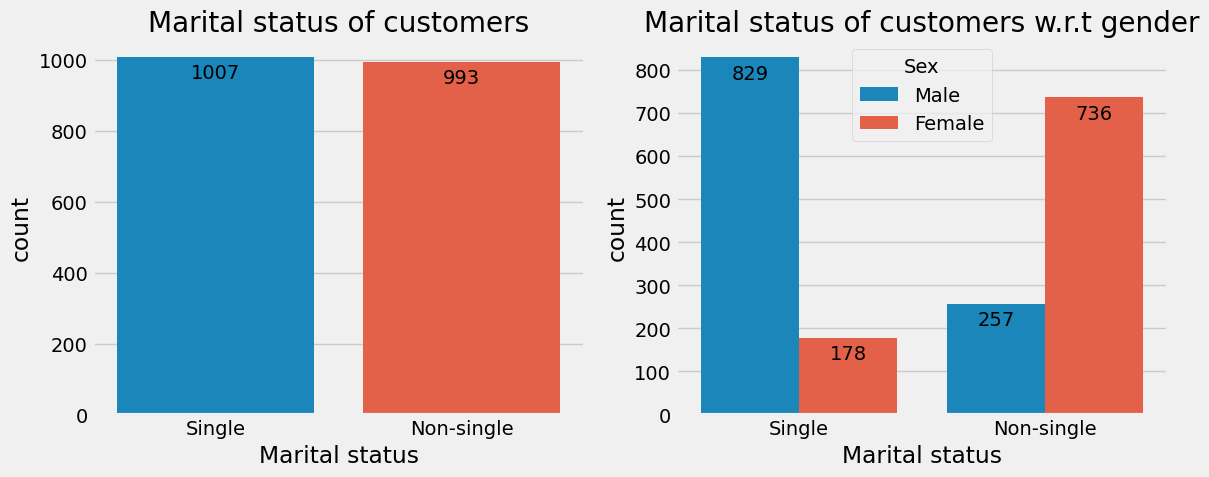

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = "Marital status", data = data)
plt.xticks(ticks = (0, 1), labels = ["Single", "Non-single"])
plt.title("Marital status of customers")
for x,y in mrt.itertuples():
    plt.text(x, y - 60, y, ha = 'center')

plt.subplot(1, 2, 2)
sns.countplot(x = "Marital status", data = data, hue = "Sex")
plt.xticks(ticks = (0, 1), labels = ["Single", "Non-single"])
plt.legend(labels = ["Male", "Female"], title = "Sex")
plt.title("Marital status of customers w.r.t gender")
for (i,j) , y in mrt_grp.itertuples():
    if j==1:
        plt.text(i + 0.2, y - 50,y , ha = 'center')
    elif j==0:
        plt.text(i - 0.2, y - 50, y , ha = 'center')


plt.tight_layout()
plt.show()



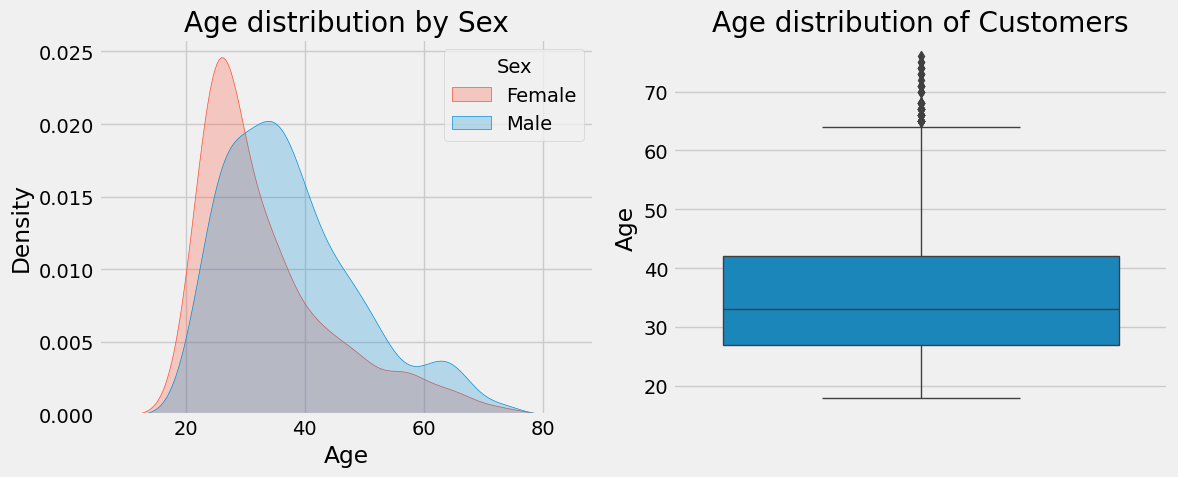

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(x = "Age", data = data, fill=True, hue = "Sex")
plt.title("Age distribution by Sex")
plt.legend(labels = ["Female", "Male"], title = "Sex")

plt.subplot(1, 2, 2)
sns.boxplot(y = "Age",data = data, linewidth=1)
plt.title("Age distribution of Customers")

plt.tight_layout()
plt.show()

In [12]:
edu = data['Education'].value_counts().to_frame()
edu_grp = data.groupby('Education')['Sex'].value_counts().to_frame()

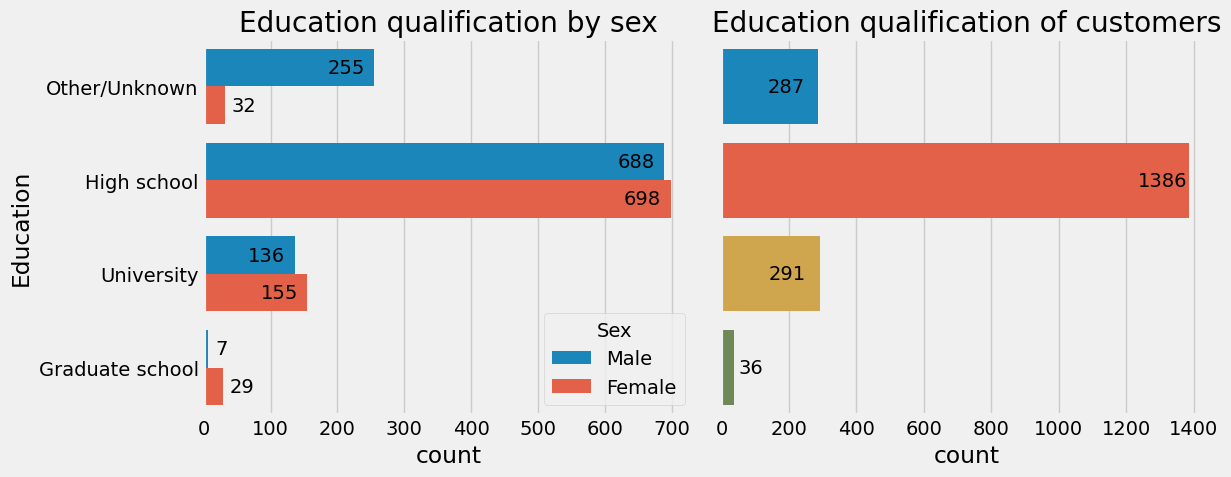

In [13]:
plt.figure(figsize=(12.5, 5))
plt.subplot(1, 2, 1)
sns.countplot(y = "Education", hue = "Sex", data = data)
plt.yticks(ticks = (0, 1, 2, 3), labels = ["Other/Unknown", "High school", "University", "Graduate school"])
plt.title("Education qualification by sex")
plt.legend(["Male", "Female"], title = "Sex", loc = 'lower right')
for (i,j), x in edu_grp.itertuples():
    if(j == 1):
        if x<120:
            plt.text(x + 10, i + 0.2, x, va = 'center')
        else:
            plt.text(x - 70, i + 0.2, x, va = 'center')
    elif(j == 0):
        if x<120:
            plt.text(x + 10, i - 0.2, x, va = 'center')
        else:
            plt.text(x - 70, i - 0.2, x, va = 'center')

plt.subplot(1, 2, 2)
ax = sns.countplot(y = "Education",  data = data)
plt.yticks(ticks = (0, 1, 2, 3), labels = ["Other/Unknown", "High school", "University", "Graduate school"])
ax.set(ylabel = None, yticks = [])
plt.title("Education qualification of customers")
for y,x in edu.itertuples():
    if(x<120):
        plt.text(x + 15, y, x, va = 'center')
    else:
        plt.text(x - 150, y, x, va = 'center')

plt.tight_layout()
plt.show()

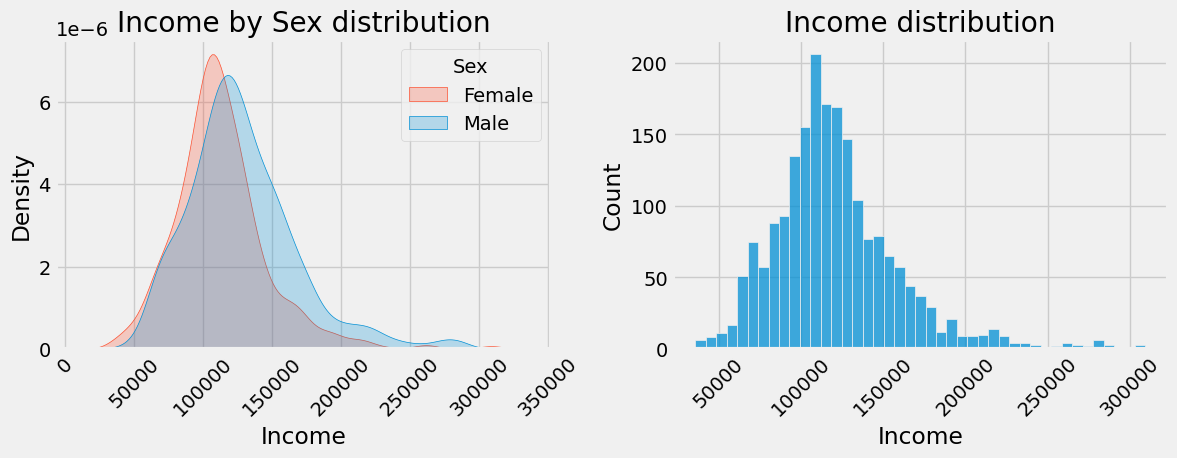

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(x = "Income", data = data, hue = "Sex", fill = True)
plt.title("Income by Sex distribution")
plt.xticks(rotation = 45)
plt.legend(["Female", "Male"], title = "Sex")

plt.subplot(1, 2, 2)
sns.histplot(x = "Income", data = data)
plt.title("Income distribution")
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In [15]:
occupation = data['Occupation'].value_counts(sort=False).to_frame()
occupation_grp = data.groupby('Occupation')['Sex'].value_counts().to_frame()

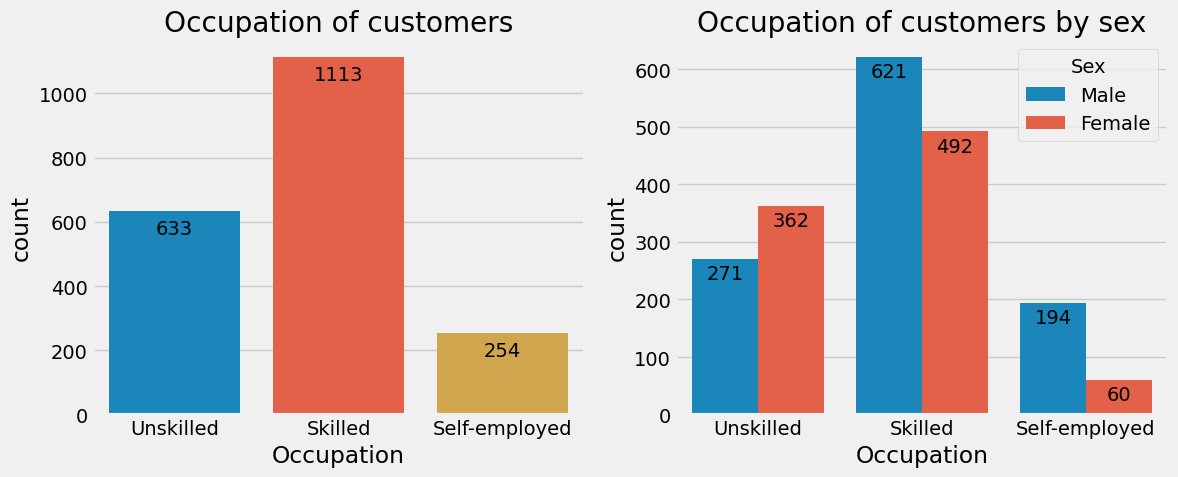

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = "Occupation", data = data)
plt.xticks((0, 1, 2), ("Unskilled", "Skilled", "Self-employed"))
plt.title("Occupation of customers");
for x,y in occupation.itertuples():
    plt.text(x, y - 70, y, ha = 'center')

plt.subplot(1, 2, 2)
ax = sns.countplot(x = "Occupation", hue = "Sex", data = data)
# ax.set(ylabel = None, yticks = [])
plt.xticks((0, 1, 2), ("Unskilled", "Skilled", "Self-employed"))
plt.legend(["Male", "Female"], title = "Sex")
plt.title("Occupation of customers by sex")
for (i,j) , y in occupation_grp.itertuples():
    if j==1:
        plt.text(i + 0.2, y - 35,y , ha = 'center')
    elif j==0:
        plt.text(i - 0.2, y - 35, y , ha = 'center')

plt.tight_layout()

## KMeans Clustering

In [17]:
X = data.values

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X[:, [2, 4]])

In [19]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', n_init = 20, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [20]:
fig = go.Figure()
fig.add_trace(go.Line(x = list(range(1, 10)), y = wcss))
fig.update_layout(xaxis_title = "No. of clusters", yaxis_title = "WCSS", title = "WCSS vs No. of clusters", width = 700, height = 500, xaxis = dict(tickvals = np.arange(1, 10)))

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




### Selecting no. of clusters as `4`

In [21]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', n_init = 20, random_state = 0)

In [22]:
data["Customer Type"] = kmeans.fit_predict(X)

In [23]:
data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Customer Type
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,1
100000002,1,1,22,1,150773,1,2,2
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,1
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1
100001997,1,1,27,1,117744,1,0,0
100001998,0,0,31,0,86400,0,0,0


In [24]:
plt.style.use('ggplot')

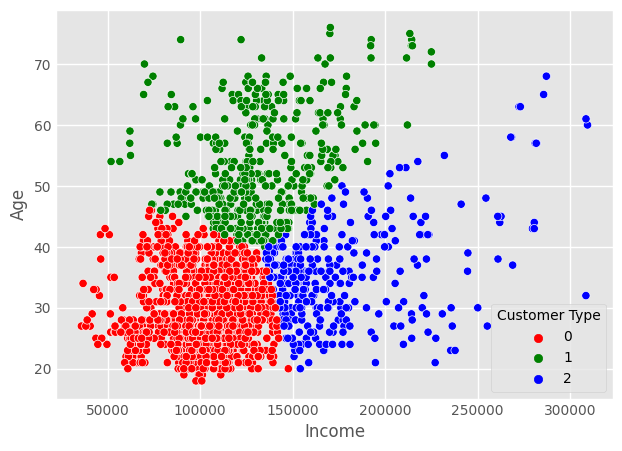

In [26]:
sns.scatterplot(x = 'Income', y = 'Age', hue = 'Customer Type', color = 'Customer Type', data = data, palette = ["r", "g", "b"]);